### Part 01 - Pytorch

## PyTorch Workflow

#### Standard Imports ####

In [5]:
import torch
from torch import nn # nn contains all of pytorch's buildign blocks for neural networks
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__


'1.13.1'

### Building first model ###
- Using Torch NN

## 1. Data (preparing and loading) ##
Data can be many things!
- Excel sheet
- Images
- Videos
- Audio

Machine Learning is a game of two parts: 
1. Get data into some numerical representation
2. Build a model to lean patterns in that numerical representation

Inputs &rarr; Numerical Encoing &rarr; Learns representation(network) &rarr; Representation Outputs &rarr; Interpret Outputs

To show this, start with linear regression.

### Use Linear regression to make a straight line with known paramters ###

In [52]:
# Create *known* parameters :    Y = A + BX
# Let weight be B  and bias be A
weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) #gets rid of extra container-like bracket
y = weight * X + bias    #essentially  y = Bx+ A

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [32]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general) ###

Typically:
* Traning set is about 60-80% (always used in ML)
* Validation set is about 10-20%  (not necessary for all forms of ML)
* Testing set is about 10-20%  (always used in ML)


Create training and test data set with our data:

In [51]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
#Validate training - to - testing ratio
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

### Useful Plot Function: ###

In [74]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
                     
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))

    #Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    #Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    #Check if the model yields a prediction
    if predictions is not None:
        #Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    #Show the Legend
    plt.legend(prop={"size":14})


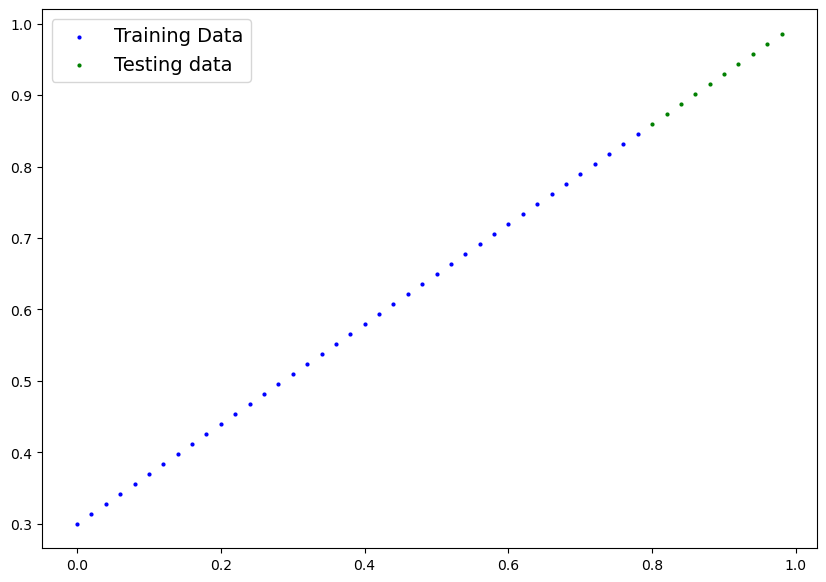

In [75]:
plot_predictions()

## 2. Build model

First Linear regression PyTorch model!

what the model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent(or get closer to) the ideal values (the weight and bias values we used to create training and testing data!)

How does it do so?
Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [76]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                 requires_grad=True,
                                                 dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, 
                                                 requires_grad=True,
                                                 dtype=torch.float))  
        #Forward emthod to define the computation in the model
        def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
            return self.weights * x + self.bias    #this is effectively the Linear regression formula                                                                           


The forward method has to be overridden when using nn.Module

### PyTorch model building essentials ###
* `torch.nn` - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* `torch.nn.parameter` - what parameters should our model try and elarn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.module` - The base class for all neural network modules, if you subclass it, you should overwrite `forward()`
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn,Module subclasses require you t overwrite forward(), this method defines what happens in the forward computation

